In [1]:
import pandas as pd

In [2]:
class_dis = pd.read_csv('class.csv')
class_dis

,id,name
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [3]:
landmark_names = ['Shelf','Chest of drawers','Kitchen & dining room table','Coffe table','Table','Desk','Gas stove','Chair', #'Person',
        'Sink', 'Couch','Door', 'Sofa bed', 'Bed', 'Bookcase','Refrigerator','Piano','Television','Toilet','Cabinetry']
print(len(landmark_names))

19


In [4]:
class_dict = {}
lids = []
for i in class_dis.index:
    name = class_dis['name'][i]
    indx = class_dis['id'][i]
    if name in landmark_names:
        class_dict[indx] = name
        lids.append(indx)
print(class_dict)

{'/m/0130jx': 'Sink', '/m/01mzpv': 'Chair', '/m/01s105': 'Cabinetry', '/m/01y9k5': 'Desk', '/m/02crq1': 'Couch', '/m/02dgv': 'Door', '/m/02wv84t': 'Gas stove', '/m/03m3pdh': 'Sofa bed', '/m/03ssj5': 'Bed', '/m/03__z0': 'Bookcase', '/m/040b_t': 'Refrigerator', '/m/04bcr3': 'Table', '/m/05kyg_': 'Chest of drawers', '/m/05r5c': 'Piano', '/m/07c52': 'Television', '/m/09g1w': 'Toilet', '/m/0gjbg72': 'Shelf', '/m/0h8n5zk': 'Kitchen & dining room table'}


In [5]:
df = pd.read_csv('annotation_train.csv')
df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610224,fffffdaec951185d,xclick,/m/0dzct,1,0.445625,0.672500,0.154784,0.200750,1,0,...,0,0,0.510000,0.445625,0.538125,0.672500,0.154784,0.168856,0.200750,0.176360
14610225,fffffdaec951185d,xclick,/m/0dzct,1,0.695625,0.786250,0.118199,0.297373,0,0,...,0,0,0.725000,0.748125,0.695625,0.786250,0.118199,0.297373,0.233583,0.207317
14610226,fffffdaec951185d,xclick,/m/0dzct,1,0.788750,0.835000,0.198874,0.272045,1,0,...,0,0,0.814375,0.814375,0.788750,0.835000,0.198874,0.272045,0.245779,0.247655
14610227,fffffdaec951185d,xclick,/m/0dzct,1,0.796875,0.951875,0.156660,0.205441,1,0,...,0,0,0.868750,0.796875,0.951875,0.942500,0.156660,0.176360,0.189493,0.205441


In [ ]:
count = dict()
image_num = 0
for l in landmark_names:
    count[l]=0

In [6]:
imageids = []
with open("set.txt",'w') as w:
    for i in df.index:
        iid = df['ImageID'][i]
        lname = df['LabelName'][i]
        if lname in lids:
            if iid not in imageids:
                imageids.append(iid)
                count[class_dict[lname]]+=1
                image_num +=1
        if i % 100000==0 and i!=0:
            print(i)
            for imageid in imageids:
                string = "train/" + str(imageid) + "\n"
                w.write(string)
            imageids = imageids[-1]
print(count)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
109792


In [7]:
import imagesize
from pascal_voc_writer import Writer

import cv2
import matplotlib.pyplot as plt

In [6]:
imageids = []
with open('set.txt','r') as f:
    while True:
        a = f.readline()
        if a == '':
            break
        a = a.split('/')[1]
        a = a.split('\n')[0]
        imageids.append(a)

In [10]:
class_dis = pd.read_csv('class.csv')
landmark_names = ['Shelf','Chest of drawers','Kitchen & dining room table','Coffee table','Table','Desk','Gas stove','Chair','Person',
        'Sink', 'Couch','Door', 'Sofa bed', 'Bed', 'Bookcase','Refrigerator','Piano','Television','Toilet','Cabinetry']
print(len(landmark_names))

class_dict = {}
lids = []
for i in class_dis.index:
    name = class_dis['name'][i]
    indx = class_dis['id'][i]
    if name in landmark_names:
        class_dict[indx] = name
        lids.append(indx)
print(class_dict)


20
{'/m/0130jx': 'Sink', '/m/01g317': 'Person', '/m/01mzpv': 'Chair', '/m/01s105': 'Cabinetry', '/m/01y9k5': 'Desk', '/m/02crq1': 'Couch', '/m/02dgv': 'Door', '/m/02wv84t': 'Gas stove', '/m/03m3pdh': 'Sofa bed', '/m/03ssj5': 'Bed', '/m/03__z0': 'Bookcase', '/m/040b_t': 'Refrigerator', '/m/04bcr3': 'Table', '/m/05kyg_': 'Chest of drawers', '/m/05r5c': 'Piano', '/m/078n6m': 'Coffee table', '/m/07c52': 'Television', '/m/09g1w': 'Toilet', '/m/0gjbg72': 'Shelf', '/m/0h8n5zk': 'Kitchen & dining room table'}


Person 411 106 648 172
Person 666 450 394 128
Person 728 538 410 176
Chair 117 0 767 711
Chair 170 3 723 509
Chair 609 432 632 485
Chair 892 805 767 615
Coffee table 711 0 767 597


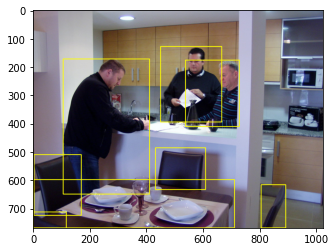

In [18]:
ROOT = '/data/jeongeun/openimage'
for imageid in imageids[4:5]:
    path = '{}/JPEGImages/{}.jpg'.format(ROOT, imageid)
    width, height = imagesize.get(path)
    src = cv2.imread(path)
    annots = df.loc[df['ImageID']==imageid]
    writer = Writer(path, width, height)
    for i in annots.index:
        label = annots['LabelName'][i]
        if label in lids:
            label = class_dict[label]
            Xmin = int(width*annots['XMin'][i])
            Xmax = int(width*annots['XMax'][i])
            Ymin = int(height*annots['YMin'][i])
            Ymax = int(height*annots['YMax'][i])
            print(label,Xmax,Xmin,Ymax,Ymin)
            writer.addObject(label, Xmin, Ymin, Xmax, Ymax)
            cv2.rectangle(src,(Xmin,Ymin),(Xmax,Ymax),(0,255,255),2)
    src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    plt.imshow(src)